In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('Economic_Index.csv')

In [3]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["year", "month"], axis = 1 , inplace = True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
##checking nuls
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

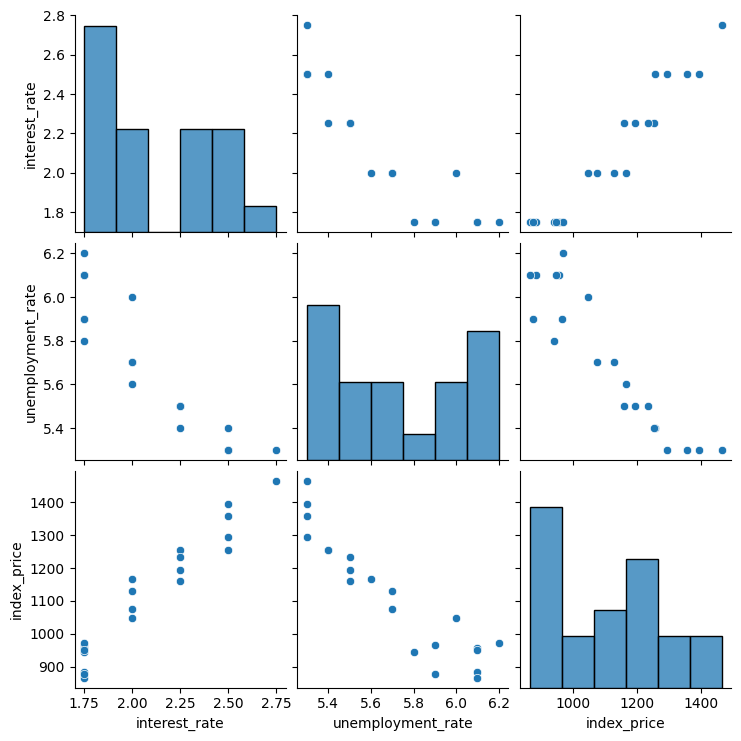

In [7]:
##visualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.920151,0.964996
unemployment_rate,-0.920151,1.000000,-0.924125
index_price,0.964996,-0.924125,1.000000


Text(0, 0.5, 'Unemployment rate')

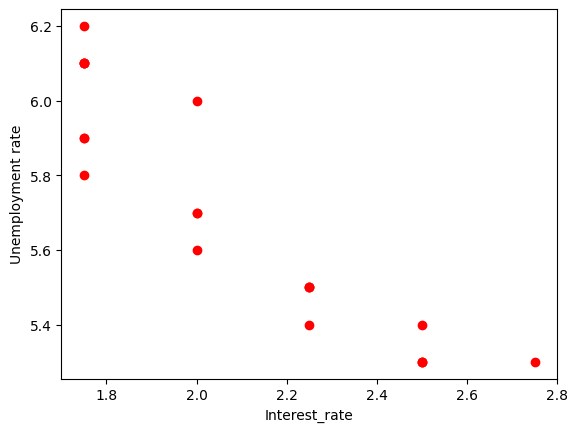

In [9]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color = 'r')

plt.xlabel("Interest_rate")
plt.ylabel("Unemployment rate")

In [10]:
X = df_index.iloc[:,:-1] ## we are removing the last column which are basically the outputs, independent features
y = df_index.iloc[:,-1] ## keeping the last column in y value, dependent features

In [11]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.25,5.4
6,2.25,5.5
7,2.25,5.5
8,2.25,5.5
9,2.00,5.6


In [12]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
Name: index_price, dtype: int64

In [13]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

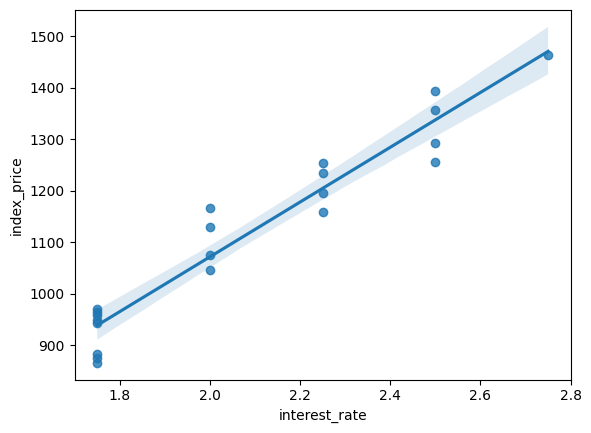

In [15]:
sns.regplot(x='interest_rate', y='index_price' ,  data = df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

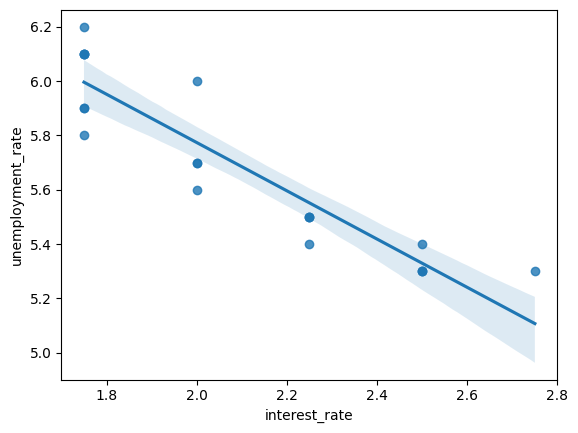

In [16]:
sns.regplot(x='interest_rate', y='unemployment_rate' ,  data = df_index)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train

array([[-0.11624764, -0.11624764],
       [ 1.62746694, -1.5112193 ],
       [-0.98810493,  1.27872403],
       [-0.98810493,  1.62746694],
       [-0.98810493,  0.58123819],
       [ 1.62746694, -1.5112193 ],
       [-0.11624764, -0.46499055],
       [-0.98810493,  0.58123819],
       [ 1.62746694, -1.16247639],
       [-0.11624764,  0.92998111],
       [ 0.75560965, -0.81373347],
       [-0.11624764, -0.11624764],
       [-0.98810493,  0.23249528],
       [-0.98810493,  1.27872403],
       [ 0.75560965, -0.81373347]])

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(x_train, y_train)

LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error' )

In [23]:
np.mean(validation_score)

np.float64(-2866.2214898690017)

In [24]:
## prediction

y_pred = regression.predict(x_test)
y_pred

array([1420.29148936,  917.6787234 ,  917.6787234 , 1328.70638298,
       1203.05319149, 1220.08723404])

In [25]:
##performance matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1978.5462358533239
43.10177304964535
44.48085246320403


In [26]:
## R square
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9491405343234323


In [27]:
##assumptions

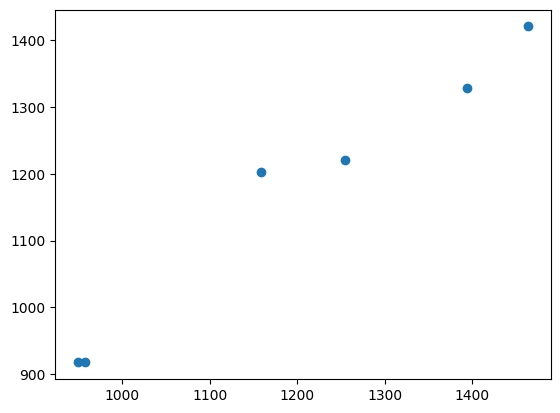

In [28]:
plt.scatter(y_test, y_pred)

In [29]:
residuals = y_test - y_pred
print(residuals)

0     43.708511
17    31.321277
15    40.321277
1     65.293617
8    -44.053191
5     33.912766
Name: index_price, dtype: float64


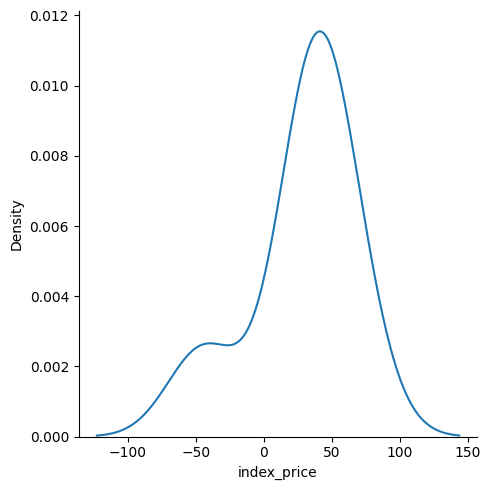

In [30]:
sns.displot(residuals,  kind='kde')

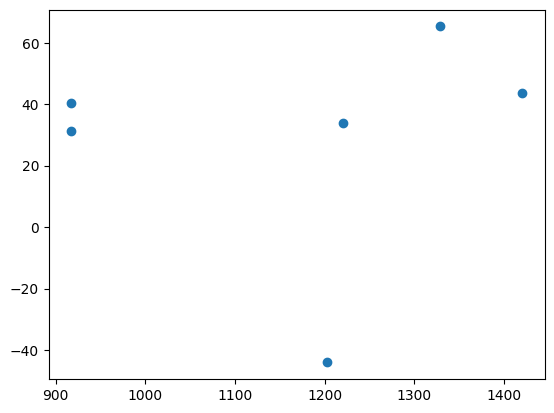

In [31]:
##scatter plot with respective to prediction and residuals

plt.scatter(y_pred, residuals)

In [32]:
print(regression.coef_)

[105.0459833  -48.84412489]


Text(0, 0.5, 'Test perdicted data')

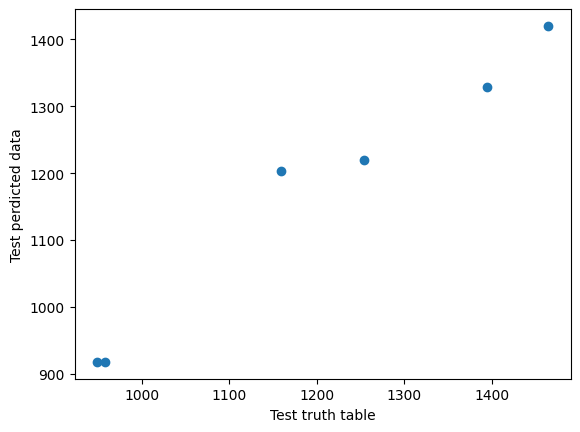

In [33]:
##assumptions

plt.scatter(y_test, y_pred)
plt.xlabel("Test truth table")
plt.ylabel("Test perdicted data")

In [34]:
import pickle

pickle.dump(regression, open('regressor.pkl','wb'))